# California housing regression

Adapted from https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

See also
* [Scikit pipelines](https://mahmoudyusof.github.io/general/scikit-learn-pipelines/)
* [Ames housing price data](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_ames_housing.html)

## Setup libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

In [38]:
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
from lightgbm import LGBMRegressor

In [4]:
import matplotlib.pyplot as plt

In [5]:
pal = sns.color_palette('flare')

## Get data

In [6]:
california_housing = fetch_california_housing(as_frame=True)

In [7]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## Data summary

In [8]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [10]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Plots

### Plot distributions

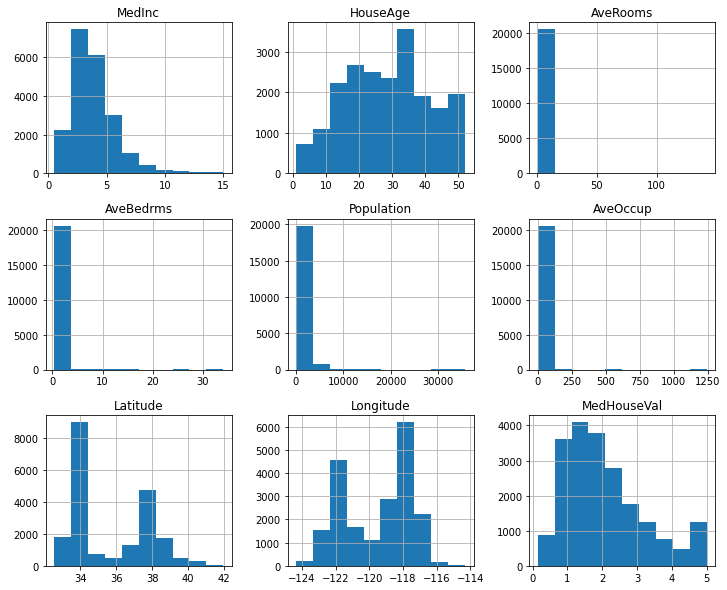

In [11]:
california_housing.frame.hist(figsize=(12, 10));

Outliers for some features

In [12]:
selected_features = ['AveRooms', 'AveBedrms', 'AveOccup', 'Population']

In [13]:
california_housing.frame[selected_features].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


## Housing prices by latitude and longitude

In [16]:
california_housing.frame.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

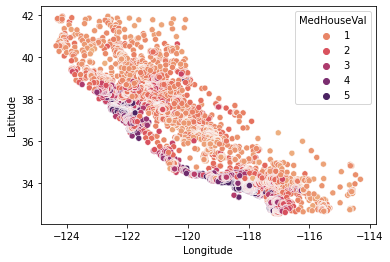

In [17]:
sns.scatterplot(
    data=california_housing.frame, x='Longitude', y='Latitude',
    hue='MedHouseVal', palette='flare')

Randomly sample a 500 point subset

In [18]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(california_housing.frame.shape[0]), size=500,
                     replace=False)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

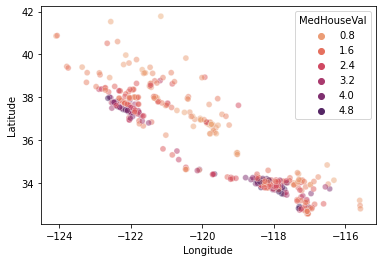

In [19]:
sns.scatterplot(
    data=california_housing.frame.iloc[indices], x="Longitude", y="Latitude",
    hue="MedHouseVal", palette="flare", alpha=0.5)

## Pair plot of a subset

In [20]:
columns_drop = ['Latitude', 'Longitude']
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)

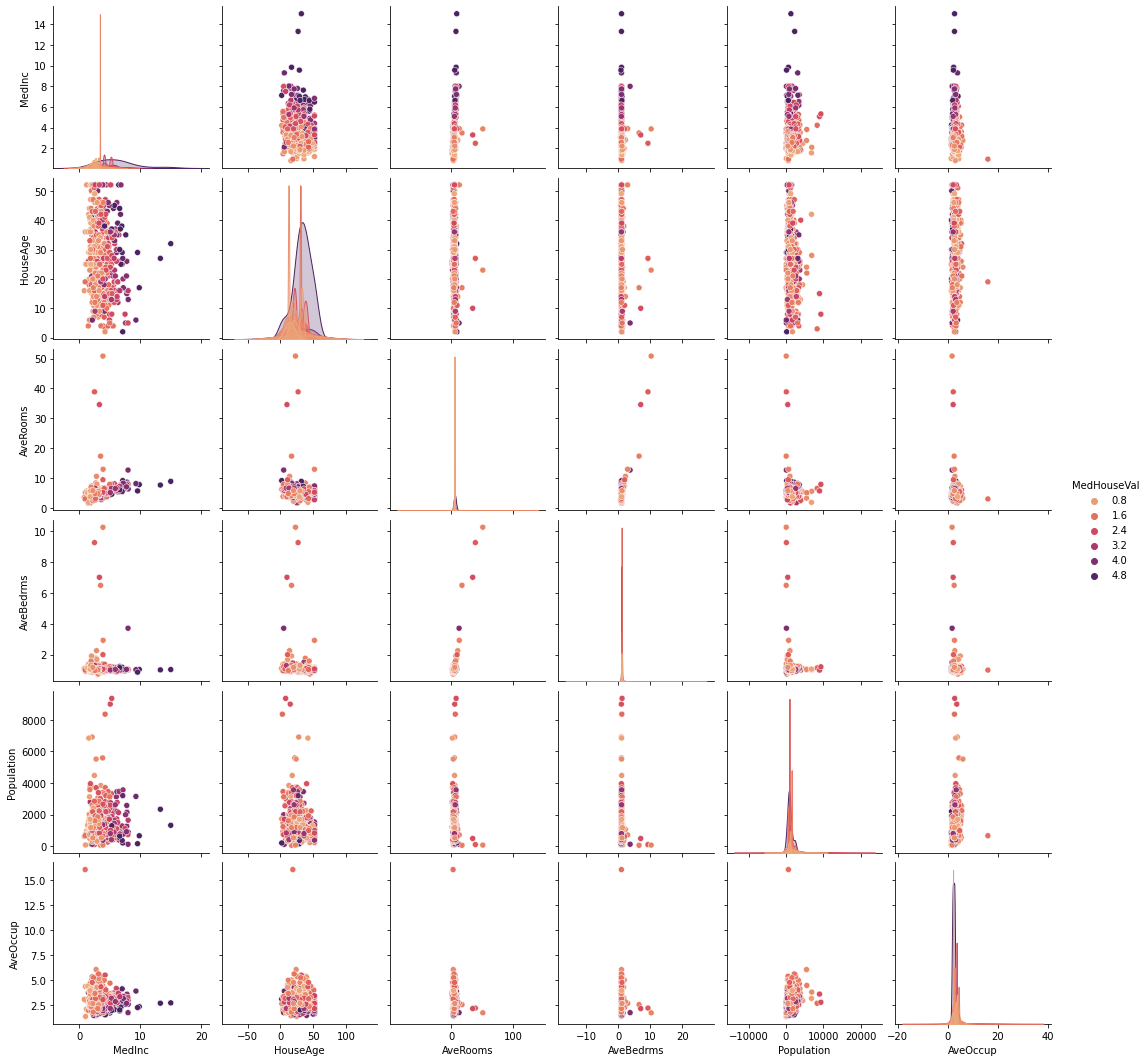

In [21]:
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="flare")

## Train the model

In [22]:
model = make_pipeline(StandardScaler(), LGBMRegressor())
# StandardScaler need for Linear Regression not Gradient boosting, 
model = LGBMRegressor()
cv_results = cross_validate(
    model, california_housing.data, california_housing.target,
    scoring=('r2',), n_jobs=2, return_estimator=False)

In [23]:
cv_results

{'fit_time': array([0.13684058, 0.13518929, 0.12506199, 0.12644243, 0.10030103]),
 'score_time': array([0.01778126, 0.01604462, 0.01211905, 0.01161098, 0.00983   ]),
 'test_r2': array([0.65501227, 0.70247357, 0.74882341, 0.69104432, 0.68879799])}

## Grid search

In [39]:
gbm = LGBMRegressor()

In [72]:
param_grid = {
    'num_leaves': [10, 20, 40],
    'n_estimators': [10, 20, 40]
}

In [73]:
clf = GridSearchCV(
    estimator=gbm, scoring='r2', param_grid=param_grid)

In [74]:
clf.fit(california_housing.data, california_housing.target)

GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'n_estimators': [10, 20, 40],
                         'num_leaves': [10, 20, 40]},
             scoring='r2')

In [75]:
clf.cv_results_['mean_test_score']

array([0.45658201, 0.49766839, 0.5189229 , 0.5787746 , 0.61068845,
       0.63090211, 0.65104579, 0.66759376, 0.67270465])

In [76]:
clf.best_params_

{'n_estimators': 40, 'num_leaves': 40}

In [77]:
model = LGBMRegressor(**clf.best_params_)
cv_results = cross_validate(
    model, california_housing.data, california_housing.target,
    scoring=('r2',), n_jobs=2, return_estimator=False)

In [78]:
cv_results

{'fit_time': array([0.08798909, 0.08339548, 0.08924866, 0.08195615, 0.06797552]),
 'score_time': array([0.00573635, 0.00575948, 0.00599718, 0.0059979 , 0.00476003]),
 'test_r2': array([0.58600955, 0.69803656, 0.73754832, 0.66555711, 0.67637171])}